<a href="https://colab.research.google.com/github/kvishnu78/ML-Algorithms/blob/main/PCA_on_Wine_Quality_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

upoading dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving winequalityN.csv to winequalityN.csv


Import Section

In [ ]:
import pandas as pd #to read from excel
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA 

from sklearn.model_selection import train_test_split#to split training and testing sample

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm # to use SVM classifier
from sklearn.linear_model import LinearRegression

from sklearn import metrics



Loading the dataset

In [ ]:
dataset=pd.read_csv("winequalityN.csv")#loading the dataset
dataset.isnull().sum()#checking for null values

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
dataset.update(dataset.fillna(dataset.mean()))#removing the numerical null values using mean value, and fillna is used to fill empty values
dataset.isnull().sum()#rechecking number of empty cells

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
features=['fixed acidity','volatile acidity','citric acid','chlorides','alcohol','residual sugar','pH','density','sulphates','free sulfur dioxide','total sulfur dioxide']#input values to the model-not all the attributes are chosen
x=dataset[features]
y=dataset['quality'] 
print(x)

      fixed acidity  ...  total sulfur dioxide
0               7.0  ...                 170.0
1               6.3  ...                 132.0
2               8.1  ...                  97.0
3               7.2  ...                 186.0
4               7.2  ...                 186.0
...             ...  ...                   ...
6492            6.2  ...                  44.0
6493            5.9  ...                  51.0
6494            6.3  ...                  40.0
6495            5.9  ...                  44.0
6496            6.0  ...                  42.0

[6497 rows x 11 columns]


Step 1: Standization/ Normalisation

In [ ]:
N=Normalizer()
S=StandardScaler()
MMS=MinMaxScaler()

norm_x=N.fit_transform(x)
scale_x=S.fit_transform(x)
MinMax_x=MMS.fit_transform(x)

# subtract mean of each attribute 
mean=np.mean(x, axis=0)
prep_x=x-mean

X=[norm_x,scale_x,MinMax_x,prep_x]
X_desc=["Normalised data","Data standardised using StdScaler","Data standardised using minMaxScaler","Mean Subtracted Data"]

In [ ]:
def pca(prep_x, n_components,prep_x_desc):

  print("Data Taken is",prep_x_desc)
  '''Step 2: Finding Covariance matrix'''
  cov_mat=np.cov(prep_x,rowvar=False)
  # row var=false means that each column represents a variable, else each row reoresents a variable
  # print(cov_mat)


  '''Step 3: Find Eigen vectors and Eigen values'''
  eigen_values,eigen_vectors=np.linalg.eig(cov_mat)
  eigen_vectors=eigen_vectors.T
  # print("Eigen values:\n",eigen_values)
  # print("Eigen vectors:\n",eigen_vectors)


  '''Step 4: Sort Eigen values and choose k eigen vectors'''
  # sum of square of of each element in the vector should be 1, i.e. it should be a unit eigen vectors
  sq_eigen_vec=[]
  for i in eigen_vectors:
    sq_eigen_vec.append(i**2)
  # check if only unit vectors are formed as eigen vectors--> as they are better to form the basis for the new projection dimension

  ratio=sum(sum(sq_eigen_vec))/len(sq_eigen_vec)
  if abs(ratio-1)<=0.1 :
    # Already in sorted order here, but for making sure we get the dec order we sort again
    eigen_values_sorted,eigen_vectors_sorted=zip(*sorted(zip(eigen_values,eigen_vectors)))
    # Ascending sort

    # to do decending sort
    eigen_values_dec=[]
    eigen_vectors_dec=[]
    for i in reversed(range(len(eigen_values_sorted))):
      eigen_values_dec.append(eigen_values_sorted[i])
      eigen_vectors_dec.append(eigen_vectors_sorted[i])

    print("Sorted Eigen Values:\n",eigen_values_dec)
    print("Eigen vectors sorted based on eigen values:\n",eigen_vectors_dec) 


    # Finding the % of variance in each eigen vectors using eigen values --> Explained variance
    eigen_val_sum=sum(eigen_values_dec)
    exp_var=[]
    # explained variance
    cum_var=[]
    # cummulative variance
    Accumulation=0
    for i in (range(len(eigen_values_dec))):
      Accumulation=Accumulation+eigen_values_dec[i]
      cum_var.append(100*(Accumulation/eigen_val_sum))
      exp_var.append(100*(eigen_values_dec[i]/eigen_val_sum))
    print("Explained variance : \n",exp_var,"\nCummulative variance : \n",cum_var)


    '''Step 5: Construct Projection matrix : We use only the first n_components eigen vectors'''
    W=np.array(eigen_vectors_dec[0:n_components])
    # Creating projection matrix where each column is a principle component we have chosen, here no. of PC=2
    print("Projection Matrix:\n",W,"\n")


    '''Step 6: Transformation'''
    new_x=np.dot(prep_x,W.T)
    priniciple_components=pd.DataFrame(data=new_x,columns=["Principle component 1","Principle component 2"])
    new_dataset=pd.concat([priniciple_components,y],axis=1)
    print("A part of the projected dataset:\n",new_dataset.head(5),"\n\n") 
    
    return new_dataset,True

  else:
    print("Non unit Eigen Vectors generated")
    return None,False



In [ ]:
Outputs=[]
flg=[]
for i in range(4):
  d=pca(X[i],2,X_desc[i])
  dataset=d[0]
  flg.append(d[1])
  Outputs.append(dataset)

Data Taken is Normalised data
Sorted Eigen Values:
 [0.03133941710542001, 0.009202309795308419, 0.0012332230204598954, 0.0006513822593296156, 0.00044954741075822627, 3.835558577722419e-05, 9.154693008190815e-06, 4.59101986200241e-06, 2.525463448358954e-06, 3.4110191746282597e-07, 1.97430343594973e-07]
Eigen vectors sorted based on eigen values:
 [array([ 0.53646923,  0.03339519,  0.01679935,  0.00542142,  0.65353446,
        0.09811005,  0.19981838,  0.06002171,  0.03994278,  0.16063984,
       -0.45067778]), array([-0.17162214, -0.0069512 , -0.00891586, -0.00128427, -0.16626019,
       -0.04473392, -0.04823491, -0.01579928, -0.00853589,  0.95860711,
       -0.13855012]), array([-7.33575953e-02, -6.66374707e-03,  2.10008180e-03, -6.68144205e-04,
       -1.81638737e-01,  9.61977708e-01, -5.41949580e-02, -1.38468523e-02,
       -1.32798604e-02, -2.87218187e-02, -1.79012665e-01]), array([ 0.80607689, -0.02556839,  0.05698766,  0.00403492, -0.56460449,
       -0.0309887 , -0.11204409, -0.0

Visualising the New dataset

In [ ]:
def plot_dataset(new_dataset,desc):
  print("Transformed dataset from",desc)
  fig,ax=plt.subplots()
  colors={3:'red',4:'violet',5:'pink',6:'black',7:'blue',8:'yellow',9:'green'}
  ax.scatter(new_dataset['Principle component 1'],new_dataset['Principle component 2'],c=new_dataset['quality'].map(colors))
  plt.xlabel("principle component 1")
  plt.ylabel("principle component 2")
  plt.title("Two principle component and class")
  plt.show()
  print("\n")


Transformed dataset from Normalised data


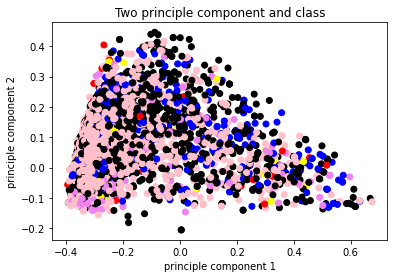



Transformed dataset from Data standardised using StdScaler


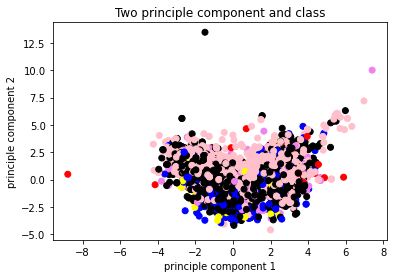



Transformed dataset from Data standardised using minMaxScaler


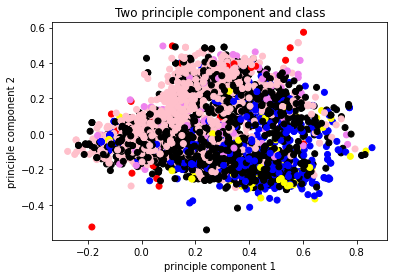



Transformed dataset from Mean Subtracted Data


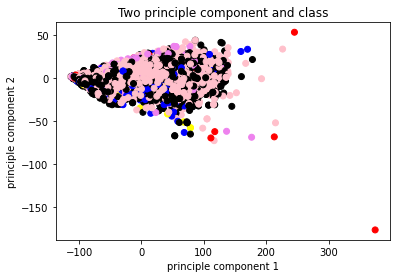

In [ ]:
for i in range(4):
  if (flg[i]!=False):
    plot_dataset(Outputs[i],X_desc[i])

Step 7: Priniciple components using inbuilt function to compare our results

A part of the projected dataset:
    Principle component 1  Principle component 2  quality
0              56.718595               1.805834        6
1              11.848669             -19.905123        6
2             -18.288446               3.848274        6
3              72.226040              -0.178224        6
4              72.226040              -0.178224        6 



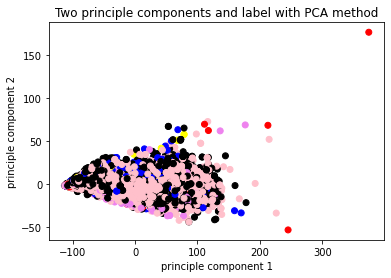

In [ ]:
pca=PCA(n_components=2)
new_x_meth=pca.fit_transform(prep_x)
priniciple_components_meth=pd.DataFrame(data=new_x_meth,columns=["Principle component 1","Principle component 2"])
new_dataset_meth=pd.concat([priniciple_components_meth,y],axis=1)
print("A part of the projected dataset:\n",new_dataset_meth.head(5),"\n")
fig,ax=plt.subplots()
colors={3:'red',4:'violet',5:'pink',6:'black',7:'blue',8:'yellow',9:'green'}
ax.scatter(new_dataset_meth['Principle component 1'],new_dataset_meth['Principle component 2'],c=new_dataset_meth['quality'].map(colors))
plt.xlabel("principle component 1")
plt.ylabel("principle component 2")
plt.title("Two principle components and label with PCA method")
plt.show()



In [ ]:
dataset=Outputs[3]
# The dataset with reduced dimensions
attribute=['Principle component 1','Principle component 2']
x=dataset[attribute]
y=dataset['quality']
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=3,shuffle=True)#to divide into random test and train samples,
#  .10 indicates 10% data for testing, random state=3 is used to control the shuffles and reproduce the splits,shuffle indiactes shuffle the data before splitting

In [ ]:
train_xn=N.fit_transform(train_x)
test_xn=N.fit_transform(test_x)
train_xs=S.fit_transform(train_x)
test_xs=S.fit_transform(test_x)


KNN

When K is between  2  and  4546
Maximum Precison= 91.81  for K= 1450
Maximum Recall= 20.48  for K= 5
Maximum Accuracy= 44.77  for K= 401
METRICS FOR DIFFERNT K:



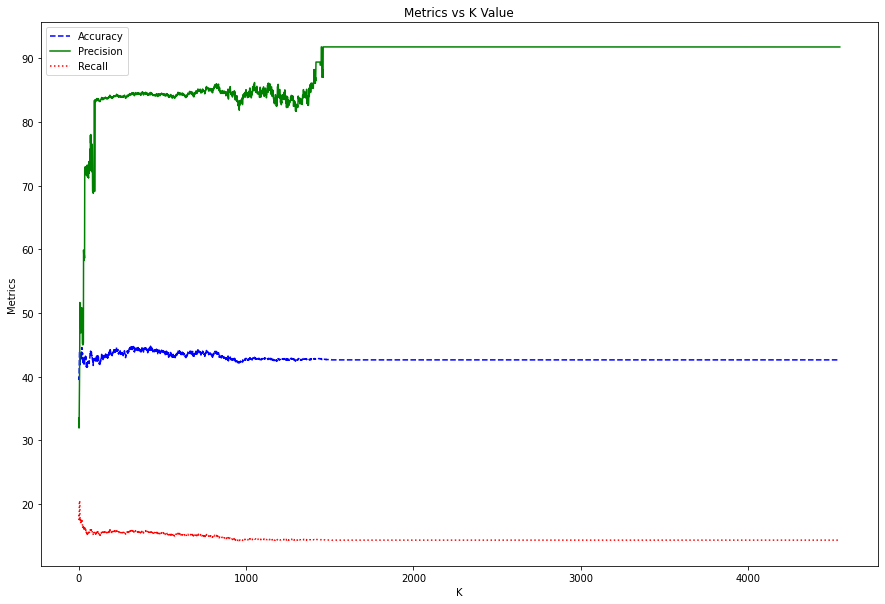

In [ ]:
accuracy=[]
precision=[]
recall=[]
met=[]
start=2
end=4547
increment=1


for i in range(start,end,increment):
    KNN=KNeighborsClassifier(n_neighbors=i,p=2)#p decides the distance metrics, p=2 means euclidean distance(also the default value)
    KNN.fit(train_xs,train_y)
    pred_y=KNN.predict(test_xs)
    acc=round(100*metrics.accuracy_score(test_y,pred_y),2)
    pre=round(100*metrics.precision_score(test_y,pred_y,average='macro',zero_division=1),2)
    rec=round(100*metrics.recall_score(test_y,pred_y,average='macro'),2)  
    met.append([i,acc,rec,pre])
    accuracy.append(acc)
    precision.append(pre)
    recall.append(rec)

    

print("When K is between ",start," and ", end-1)
print("Maximum Precison=",max(precision)," for K=",precision.index(max(precision))+2)
print("Maximum Recall=",max(recall)," for K=",recall.index(max(recall))+2)
print("Maximum Accuracy=",max(accuracy)," for K=",accuracy.index(max(accuracy))+2)


print("METRICS FOR DIFFERNT K:\n")
plt.figure(figsize=(15,10))
plt.plot(range(start,end,increment),accuracy,color='blue',linestyle='dashed',markersize=10,label="Accuracy")
#color,linestyle,marker,markerfacecolor,markersize describe plot properties
#first 2 parameters are the x and y values
plt.plot(range(start,end,increment),precision,color='green',linestyle='solid',markersize=10,label="Precision")
#color,linestyle,marker,markerfacecolor,markersize describe plot properties
#first 2 parameters are the x and y values
plt.plot(range(start,end,increment),recall,color='red',linestyle='dotted',markersize=10,label="Recall")
#color,linestyle,marker,markerfacecolor,markersize describe plot properties
#first 2 parameters are the x and y values

plt.title('Metrics vs K Value')
plt.xlabel('K')
plt.ylabel('Metrics')

leg = plt.legend();
# plt.legend(frameon=False, loc='lower center', ncol=2)

SVM

Confusion matrix for the  Linear kernal SVC and 70-30 split  :



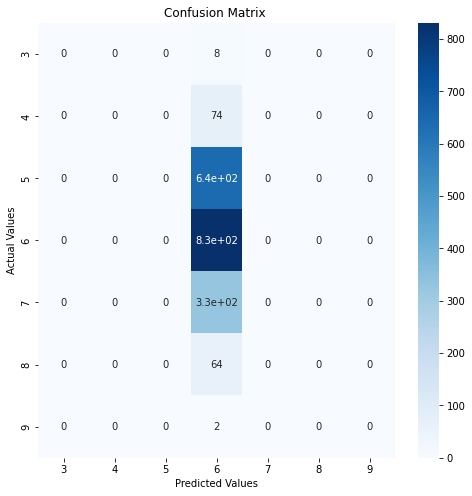



Confusion matrix for the  Polynomial kernal SVC and 70-30 split  :



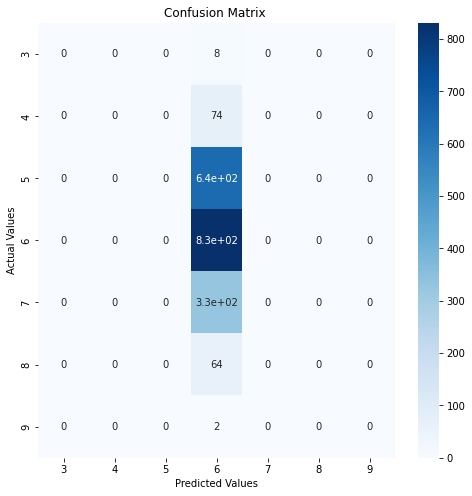



Kernel Function        Dataset        Accuracy    Precision    Recall
---------------------  -----------  ----------  -----------  --------
Linear kernal SVC      70-30 split     42.6154      91.8022   14.2857
Polynomial kernal SVC  70-30 split     42.6154      91.8022   14.2857


In [ ]:
def confusion(test_y,pred_y):
  cm=metrics.confusion_matrix(test_y,pred_y,)
  #Datatframe to plot confusion matrix
  df=pd.DataFrame(cm,index=['3','4','5','6','7','8','9'],columns=['3','4','5','6','7','8','9'])
  plt.figure(figsize=(8,8))
  sns.heatmap(df,annot=True,cmap='Blues')
  st='Confusion Matrix '
  plt.title(st)
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  plt.show()
  print("\n")

table=[]
def res(model,xin,yin,xtest,ytest,kernelName,combination):
  model.fit(xin,yin)
  y_pred=model.predict(xtest)
  print("Confusion matrix for the ", kernelName ,"and",combination," :\n")
  confusion(ytest,y_pred)
  accuracy=100*metrics.accuracy_score(ytest,y_pred)
  precision=100*metrics.precision_score(ytest,y_pred,average="macro",zero_division=1)#macro tells to find unweighted avg
  recall=100*metrics.recall_score(ytest,y_pred,average="macro",zero_division=1)
  table.append([kernelName,combination,accuracy,precision,recall])

def modelDefinition(kernelfun,descr):
  model=svm.SVC(kernel=kernelfun)
  res(model,train_xn,train_y,test_xn,test_y,descr,"70-30 split")


modelDefinition("linear","Linear kernal SVC")
modelDefinition("poly","Polynomial kernal SVC")
# since svm is a binary classification natively, it uses one to one scheme while classifying a multi class problem
# n(n-1)/2 classifiers are run

print(tabulate(table,headers=["Kernel Function","Dataset","Accuracy","Precision","Recall"]))


Linear Regression


In [ ]:
def lineEQ(model):
  s="y="
  for i in range(len(model.coef_)):
    s=s+str(round(model.coef_[i],3))+"*pc"+str(i+1)+"+"
  s=s+str(round(model.intercept_,3))
  print('Equation of the line: ',s)

 

#standardized data
lrs=LinearRegression()
lrs.fit(train_xs,train_y)
y_pred=lrs.predict(test_xs)
MSE=round(metrics.mean_squared_error(test_y,y_pred),5)
MAE=round(metrics.mean_absolute_error(test_y,y_pred),5)
print("\nWith Standardized data:\nMean Squared error = ",MSE,"\nMean Absolute Error = ",MAE)
lineEQ(lrs)


#normalized data
lrn=LinearRegression()
lrn.fit(train_xn,train_y)
y_pred=lrn.predict(test_xn)
MSE=round(metrics.mean_squared_error(test_y,y_pred),5)
MAE=round(metrics.mean_absolute_error(test_y,y_pred),5)
print("\nWith Normalized data:\nMean Squared error = ",MSE,"\nMean Absolute Error = ",MAE)
lineEQ(lrn)


With Standardized data:
Mean Squared error =  0.78087 
Mean Absolute Error =  0.69084
Equation of the line:  y=-0.041*pc1+-0.102*pc2+5.818

With Normalized data:
Mean Squared error =  0.77326 
Mean Absolute Error =  0.688
Equation of the line:  y=-0.032*pc1+-0.343*pc2+5.826
